# Откроем

In [1]:
%pip install pandas-profiling
%pip install imblearn
%pip install optuna

Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import cross_val_score
import optuna
from optuna.samplers import TPESampler
import joblib
import warnings

warnings.filterwarnings("ignore")

In [3]:
test = pd.read_csv('D:/titanic/test.csv')
train = pd.read_csv('D:/titanic/train.csv')
gender_submission = pd.read_csv('D:/titanic/gender_submission.csv')

In [4]:
display(test)
test.profile_report()

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0              330911    7.8292   NaN        Q  
1    female  47.0      1      0              363272    7.0000   NaN        S  
2      male  62.0      0      0              240276    9.6875   NaN        Q  
3      male  27.0      0      0              315154    8.6625   NaN        S  
4    female  22.0      1      1             3101298   12.2875   NaN        S  
..      ...   ...    ...    ...                 ...       ...   ...      ...  
413    male   NaN      0      0           A.5. 3236    8.0500   NaN        S  
414  female  39.0      0      0            PC 17758  108.9000  C105        C  
415    male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416    male   NaN      0      0              359309    8.0500   NaN        S  
417    male   NaN      1      1                2668   22.3583   NaN        C  

[418 rows x 11 columns]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
display(train)
train.profile_report()

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
display(gender_submission)
gender_submission.profile_report()

PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
train.duplicated().sum()

0

In [8]:
test.duplicated().sum()

0

In [9]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [10]:
test.describe()

PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200

# Откорректируем данные 

In [11]:
test = test.merge(gender_submission, on='PassengerId', how='left')
test #Объединим тестовую таблицу с ответами, чтобы в дальнейшем не было проблем при удалении ненужных колонок

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  \
0      male  34.5      0      0              330911    7.8292   NaN        Q   
1    female  47.0      1      0              363272    7.0000   NaN        S   
2      male  62.0      0      0              240276    9.6875   NaN        Q   
3      male  27.0      0      0              315154    8.6625   NaN        S   
4    female  22.0      1      1             3101298   12.2875   NaN        S   
..      ...   ...    ...    ...                 ...       ...   ...      ...   
413    male   NaN      0      0           A.5. 3236    8.0500   NaN        S   
414  female  39.0      0      0            PC 17758  108.9000  C105        C   
415    male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S   
416    male   NaN      0      0              359309    8.0500   NaN        S   
417    male   NaN      1      1                2668   22.3583   NaN        C   

     Survived  
0           0  
1           1  
2           0  
3           0  
4           1  
..        ...  
413         0  
414         1  
415         0  
416         0  
417         0  

[418 rows x 12 columns]

In [12]:
train.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)
test.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

In [13]:
print(train.shape)
print(test.shape)

(891, 8)
(418, 8)


In [14]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null

In [15]:
test.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
Survived     0
dtype: int64

In [16]:
train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [17]:
train['Age'].fillna(train['Age'].median(), inplace=True) #Заполню Age медианным значением, корреляция с ЦП у данного признака
test['Age'].fillna(test['Age'].median(), inplace=True)   #незначительна

In [18]:
train[train.isnull().any(1)]

Survived  Pclass     Sex   Age  SibSp  Parch  Fare Embarked
61          1       1  female  38.0      0      0  80.0      NaN
829         1       1  female  62.0      0      0  80.0      NaN

In [19]:
test[test.isnull().any(1)]

Pclass   Sex   Age  SibSp  Parch  Fare Embarked  Survived
152       3  male  60.5      0      0   NaN        S         0

In [20]:
test['Fare'].fillna(test['Fare'].mean(), inplace=True) #Одно потерянное значение заменим средним значением
train['Embarked'].fillna('S', inplace=True) #Заменим два пропущенных значения Embarked любым доступным значением

In [21]:
train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [22]:
test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

# Исследовательский анализ

In [23]:
colors = sns.color_palette('pastel')
sns.set(rc={'figure.figsize':(15, 5)}, palette=colors) #Задам настройки таблиц

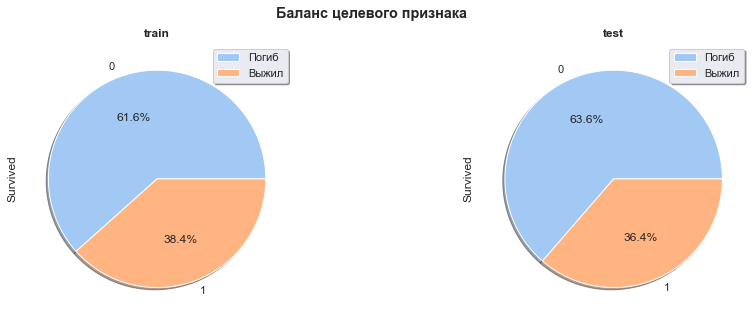

In [24]:
datas = [train, test]
titles = ['train', 'test']
fig, ax = plt.subplots(1, 2)
fig.suptitle('Баланс целевого признака', fontweight="bold")
AX = 0
for data in datas:
    data.Survived.value_counts().plot(kind='pie', shadow=True, autopct='%1.1f%%', ax=ax[AX])
    ax[AX].legend(['Погиб', 'Выжил'], shadow=True)
    ax[AX].set_title(titles[AX], fontweight="bold")
    AX += 1
plt.show()

Есть некий дисбаланс ЦП, с которым в дальнейшем будем работать.

In [25]:
def plots(name, column):
    fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)
    fig.suptitle(name, fontweight="bold")
    sns.barplot(data=train, x=column, y='Survived', ax=ax[0])
    ax[0].set_title(titles[0], fontweight="bold")
    sns.barplot(data=test, x=column, y='Survived', ax=ax[1])
    ax[1].set_title(titles[1], fontweight="bold")
    plt.show()

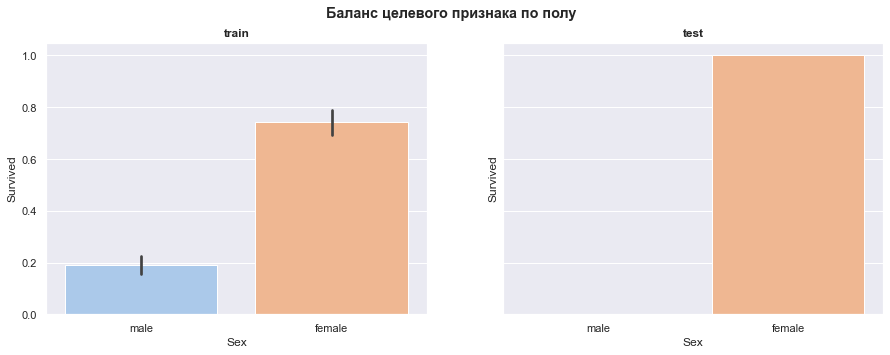

In [26]:
plots('Баланс целевого признака по полу', 'Sex')

In [27]:
test.loc[(test['Sex']=='male') & (test['Survived']==1)]

Empty DataFrame
Columns: [Pclass, Sex, Age, SibSp, Parch, Fare, Embarked, Survived]
Index: []

Как видим, между признаком Sex и ЦП есть сильная корреляция. Женщины имеют максимальный шанс выжить, тогда как мужчины - нет.

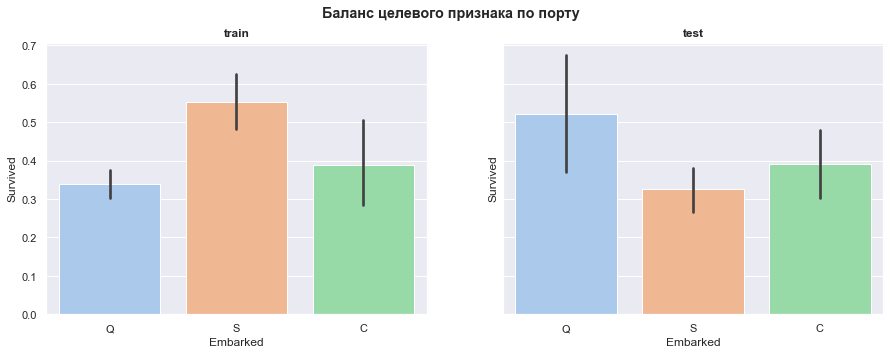

In [28]:
plots('Баланс целевого признака по порту', 'Embarked')

Сильных зависимостей мы тут не увидели.

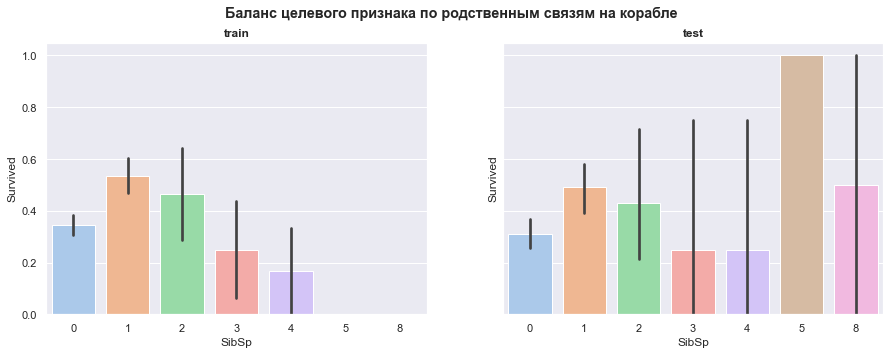

In [29]:
plots('Баланс целевого признака по родственным связям на корабле', 'SibSp')

In [30]:
test.loc[(test['SibSp']==5) | (test['SibSp']==8)]

Pclass     Sex   Age  SibSp  Parch   Fare Embarked  Survived
140       3  female  10.0      5      2  46.90        S         1
188       3  female  27.0      8      2  69.55        S         1
360       3    male  14.5      8      2  69.55        S         0

Меньше всего шансов выжить, если у человека 3-4 родственника. Вариант с 5-8 родственниками являются либо выбросами, либо некорректной записью. В целом, больше всего шансов выжить у человека с одним родственником на борту.

Получается, больше всего шансов выжить имеет женщина с одним родственником на борту, первого класса и заплатившая большую сумму за билет.

# Обучение модели

## Подготовка данных

In [31]:
features_train, target_train = train.drop(columns='Survived', axis=1), train['Survived']
features_test, target_test = test.drop(columns='Survived', axis=1), test['Survived'] #Разделение признаков

In [32]:
numeric = [*features_train.select_dtypes(exclude=['object']).columns]
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric]) #Масштабирование

In [33]:
features_train = pd.get_dummies(features_train, drop_first=True)
features_test = pd.get_dummies(features_test, drop_first=True) #One Hot Encoding

In [34]:
features_train.shape

(891, 8)

In [35]:
features_test.shape

(418, 8)

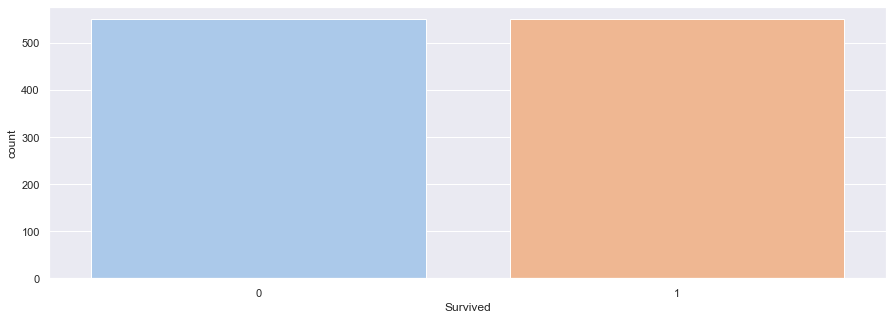

In [36]:
smote = SMOTE(random_state=1)
features_train, target_train = smote.fit_resample(features_train, target_train)
sns.countplot(target_train)
plt.show() #Балансировка

In [37]:
features_train.shape

(1098, 8)

In [38]:
target_train.shape

(1098,)

## Обучение

In [39]:
sampler = TPESampler(seed=10)
def objective(trial):
    criterion = trial.suggest_categorical('criterion', ['gini','entropy'])
    max_depth = trial.suggest_int('max_depth', 1, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 10, 100, 10)
    model_dt = DecisionTreeClassifier(random_state=1, criterion=criterion, 
                                     max_depth=max_depth, 
                                     min_samples_leaf=min_samples_leaf,
                                     class_weight='balanced'
                                     )
    model_dt.fit(features_train , target_train)
    trial.set_user_attr(key="best_booster", value=model_dt)
    cross_valid = cross_val_score(model_dt, features_train, target_train, cv=5, scoring='f1', n_jobs=-1).mean()
    return cross_valid
def callback(study, trial):
    if study.best_trial.number == trial.number:
        study.set_user_attr(key="best_booster", value=trial.user_attrs["best_booster"])
study = optuna.create_study(direction='maximize', sampler=sampler)
study.optimize(objective, n_trials=1000, callbacks=[callback])
model_dt = study.user_attrs["best_booster"]
print('F1:', study.best_value, 'с параметрами:', study.best_params)

[I 2022-12-14 21:10:43,603] A new study created in memory with name: no-name-566c5106-9a84-44fa-b7d7-d138fd9c9ceb
[I 2022-12-14 21:10:43,730] Trial 0 finished with value: 0.7609532874259595 and parameters: {'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 80}. Best is trial 0 with value: 0.7609532874259595.
[I 2022-12-14 21:10:43,848] Trial 1 finished with value: 0.7609532874259595 and parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 80}. Best is trial 0 with value: 0.7609532874259595.
[I 2022-12-14 21:10:43,974] Trial 2 finished with value: 0.7609532874259595 and parameters: {'criterion': 'gini', 'max_depth': 14, 'min_samples_leaf': 100}. Best is trial 0 with value: 0.7609532874259595.
[I 2022-12-14 21:10:44,093] Trial 3 finished with value: 0.7496301229393121 and parameters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_leaf': 70}. Best is trial 0 with value: 0.7609532874259595.
[I 2022-12-14 21:10:44,108] Trial 4 finished with value: 0.76095328

F1: 0.8162150817512112 с параметрами: {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 10}


F1: 0.8162150817512112 с параметрами: {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 10}

In [40]:
def objective(trial):
    criterion = trial.suggest_categorical('criterion', ['entropy'])
    n_estimators = trial.suggest_int('n_estimators', 3, 15, 3)
    max_depth = trial.suggest_int('max_depth', 1, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 10, 100, 10)
    model_rf = RandomForestClassifier(random_state=1, criterion=criterion,
                                     n_estimators=n_estimators, 
                                     max_depth=max_depth, 
                                     min_samples_leaf=min_samples_leaf,
                                     class_weight='balanced'
                                     )
    model_rf.fit(features_train , target_train)
    trial.set_user_attr(key="best_booster", value=model_rf)
    cross_valid = cross_val_score(model_rf, features_train, target_train, cv=5, scoring='f1', n_jobs=-1).mean()
    return cross_valid
def callback(study, trial):
    if study.best_trial.number == trial.number:
        study.set_user_attr(key="best_booster", value=trial.user_attrs["best_booster"])
study = optuna.create_study(direction='maximize', sampler=sampler)
study.optimize(objective, n_trials=500, callbacks=[callback])
model_rf = study.user_attrs["best_booster"]
print('F1:', study.best_value, 'с параметрами:', study.best_params)

[I 2022-12-14 21:11:09,113] A new study created in memory with name: no-name-46b20360-caf5-4f3c-a641-5afe22a7b75c
[I 2022-12-14 21:11:09,166] Trial 0 finished with value: 0.7961510336154196 and parameters: {'criterion': 'entropy', 'n_estimators': 9, 'max_depth': 9, 'min_samples_leaf': 20}. Best is trial 0 with value: 0.7961510336154196.
[I 2022-12-14 21:11:09,226] Trial 1 finished with value: 0.7749208836107374 and parameters: {'criterion': 'entropy', 'n_estimators': 15, 'max_depth': 4, 'min_samples_leaf': 80}. Best is trial 0 with value: 0.7961510336154196.
[I 2022-12-14 21:11:09,270] Trial 2 finished with value: 0.7720848449872013 and parameters: {'criterion': 'entropy', 'n_estimators': 6, 'max_depth': 9, 'min_samples_leaf': 40}. Best is trial 0 with value: 0.7961510336154196.
[I 2022-12-14 21:11:09,304] Trial 3 finished with value: 0.7920443364376492 and parameters: {'criterion': 'entropy', 'n_estimators': 3, 'max_depth': 4, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.796

F1: 0.8231913685320695 с параметрами: {'criterion': 'entropy', 'n_estimators': 12, 'max_depth': 9, 'min_samples_leaf': 10}


F1: 0.8231913685320695 с параметрами: {'criterion': 'entropy', 'n_estimators': 12, 'max_depth': 9, 'min_samples_leaf': 10}

In [41]:
def objective(trial):
    algorithm = trial.suggest_categorical('algorithm', ['ball_tree','kd_tree', 'brute'])
    n_neighbors = trial.suggest_int('n_neighbors', 10, 30)
    model_knn = KNeighborsClassifier(n_neighbors=n_neighbors, algorithm=algorithm)
    model_knn.fit(features_train , target_train)
    trial.set_user_attr(key="best_booster", value=model_knn)
    cross_valid = cross_val_score(model_knn, features_train, target_train, cv=5, scoring='f1', n_jobs=-1).mean()
    return cross_valid
def callback(study, trial):
    if study.best_trial.number == trial.number:
        study.set_user_attr(key="best_booster", value=trial.user_attrs["best_booster"])
study = optuna.create_study(direction='maximize', sampler=sampler)
study.optimize(objective, n_trials=100, callbacks=[callback])
model_knn = study.user_attrs["best_booster"]
print('F1:', study.best_value, 'с параметрами:', study.best_params)

[I 2022-12-14 21:11:34,868] A new study created in memory with name: no-name-b9f8ede1-316e-4ba8-a84a-c931313f19bd
[I 2022-12-14 21:11:34,895] Trial 0 finished with value: 0.8140614699928056 and parameters: {'algorithm': 'kd_tree', 'n_neighbors': 23}. Best is trial 0 with value: 0.8140614699928056.
[I 2022-12-14 21:11:34,957] Trial 1 finished with value: 0.8127107360956132 and parameters: {'algorithm': 'brute', 'n_neighbors': 26}. Best is trial 0 with value: 0.8140614699928056.
[I 2022-12-14 21:11:34,976] Trial 2 finished with value: 0.8082359664254515 and parameters: {'algorithm': 'ball_tree', 'n_neighbors': 20}. Best is trial 0 with value: 0.8140614699928056.
[I 2022-12-14 21:11:34,995] Trial 3 finished with value: 0.8114667959222169 and parameters: {'algorithm': 'ball_tree', 'n_neighbors': 10}. Best is trial 0 with value: 0.8140614699928056.
[I 2022-12-14 21:11:35,050] Trial 4 finished with value: 0.8187602773594855 and parameters: {'algorithm': 'brute', 'n_neighbors': 21}. Best is t

F1: 0.8187602773594855 с параметрами: {'algorithm': 'brute', 'n_neighbors': 21}


F1: 0.8187602773594855 с параметрами: {'algorithm': 'ball_tree', 'n_neighbors': 21}

In [42]:
#Строим функцию для постройки ROC-AUC графика
def rocauc(fpr, tpr):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.show()
def results(model, features, target):
    prediction = model.predict(features)
    proba_one = model.predict_proba(features)[:, 1]
    fpr, tpr, threshold = roc_curve(target, proba_one)
    rocauc(fpr, tpr)
    print("Accuracy:", round(accuracy_score(target, prediction), 3))
    print("F1:", round(f1_score(target, prediction), 3))
    print("ROC_auc:", round(roc_auc_score(target, prediction), 3))
    print("Precision:", round(precision_score(target, prediction), 3))
    print("Recall:", round(recall_score(target, prediction), 3))
    return prediction

## Проверка на тестовой выборке

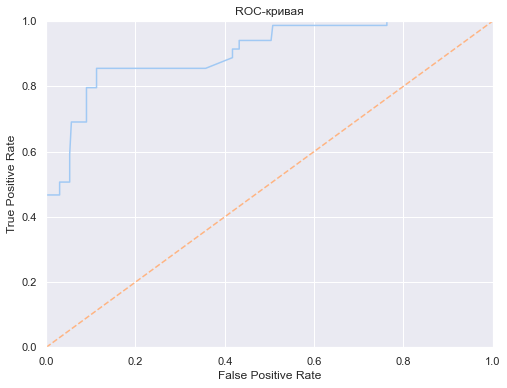

Accuracy: 0.73
F1: 0.697
ROC_auc: 0.757
Precision: 0.588
Recall: 0.855


In [43]:
prediction_dt = results(model_dt, features_test, target_test)

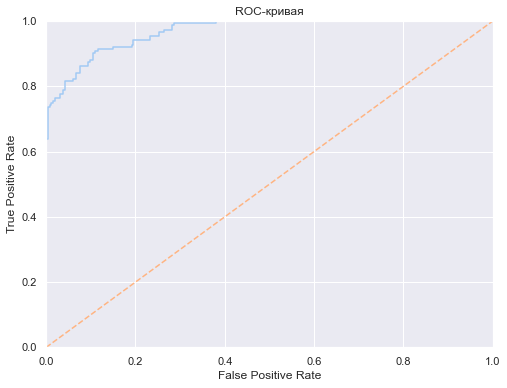

Accuracy: 0.895
F1: 0.859
ROC_auc: 0.892
Precision: 0.838
Recall: 0.882


In [44]:
prediction_rf = results(model_rf, features_test, target_test)

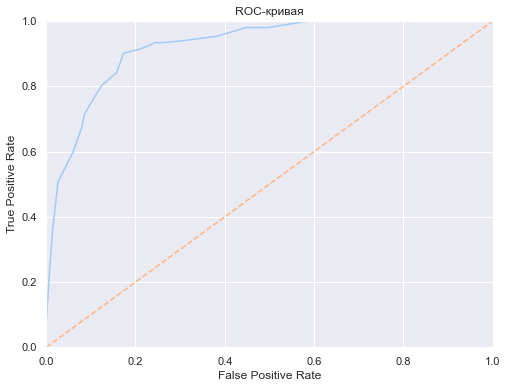

Accuracy: 0.835
F1: 0.801
ROC_auc: 0.852
Precision: 0.713
Recall: 0.914


In [45]:
prediction_knn = results(model_knn, features_test, target_test)

Как видим, самая адекватная модель - Random Forest c показателями F1: 0.8231913685320695 с параметрами: {'criterion': 'entropy', 'n_estimators': 12, 'max_depth': 9, 'min_samples_leaf': 10}. F1 на тестовой 0.859, что чуть выше, чем на тренировочной кроссвалидации.

Далее идет KNeighbors F1: 0.8187602773594855 с параметрами: {'algorithm': 'ball_tree', 'n_neighbors': 21}. F1 на тестовой 0,801. 

Decision Tree переобучилась, так что отбраковываем.

In [46]:
#joblib.dump(model_rf, 'model_rf.pkl') #Сохраняем модель
#best_model = joblib.load('model_rf.pkl') #Загружаем